# NLP Visualizations of Macbeth and Romeo and Juliet

Execute the following cell for important imports.

In [26]:
import requests
import matplotlib.pyplot as plt
import nltk

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

Execute the following cell to get the text of "Macbeth" and "Romeo and Juliet" from [Project Gutenberg](https://www.gutenberg.org/) 

In [27]:
target_url = "https://www.gutenberg.org/files/1533/1533-0.txt"
response = requests.get(target_url)
macbeth_string = response.text
macbeth_string = macbeth_string.split('*** START OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[1]
macbeth_string = macbeth_string.split('*** END OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[0]
macbeth_string = macbeth_string.lower()

target_url = "https://www.gutenberg.org/files/1513/1513-0.txt"
response = requests.get(target_url)
r_j_string = response.text
r_j_string = r_j_string.split('*** START OF THE PROJECT GUTENBERG EBOOK 1513 ***')[1]
r_j_string = r_j_string.split('*** END OF THE PROJECT GUTENBERG EBOOK 1513 ***')[0]
r_j_scenes = [i.lower() for i in r_j_string.split('SCENE')[1:]]

You now have the following variables:
* `macbeth_string`: this string contains the full text of "Macbeth"
* `r_j_string`: this string contains the full text of "Romeo and Juliet"
* `r_j_scenes`: the text from each scene of "Romeo and Juliet" is included in this Python list, with one scene per list item

Make two new variables:
* a Python list of stopwords
* a variable for using VADER's SentimentIntensityAnalyzer

In [28]:
stop_words = stopwords.words('english') # list of stopwords
sia = vader.SentimentIntensityAnalyzer() # sentiment intensity analyzer

## Macbeth

Make a list of the words in Macbeth by tokenizing `macbeth_string`:

In [29]:
tokens = [i for i in nltk.word_tokenize(macbeth_string) if i.isalpha()] # tokenize string and keep only words
print(tokens)

['cover', 'macbeth', 'by', 'william', 'shakespeare', 'contents', 'act', 'i', 'scene', 'an', 'open', 'place', 'scene', 'ii', 'a', 'camp', 'near', 'forres', 'scene', 'iii', 'a', 'heath', 'scene', 'iv', 'forres', 'a', 'room', 'in', 'the', 'palace', 'scene', 'inverness', 'a', 'room', 'in', 'castle', 'scene', 'vi', 'the', 'same', 'before', 'the', 'castle', 'scene', 'vii', 'the', 'same', 'a', 'lobby', 'in', 'the', 'castle', 'act', 'ii', 'scene', 'inverness', 'court', 'within', 'the', 'castle', 'scene', 'ii', 'the', 'same', 'scene', 'iii', 'the', 'same', 'scene', 'iv', 'the', 'same', 'without', 'the', 'castle', 'act', 'iii', 'scene', 'forres', 'a', 'room', 'in', 'the', 'palace', 'scene', 'ii', 'the', 'same', 'another', 'room', 'in', 'the', 'palace', 'scene', 'iii', 'the', 'same', 'a', 'park', 'or', 'lawn', 'with', 'a', 'gate', 'leading', 'to', 'the', 'palace', 'scene', 'iv', 'the', 'same', 'a', 'room', 'of', 'state', 'in', 'the', 'palace', 'scene', 'the', 'heath', 'scene', 'vi', 'forres', 'a'

Next, make a list of positive words and a list of negative words using the `polarity_scores` method of VADER's SentimentIntensityAnalyzer.  To do this:
* Write a for loop that iterates over your Macbeth word list
  * If the compound score of a word is positive, add the word to the positive-word list
  * If the compound score of a word is negative, add the word to the negative-word list
  * If the compound score is 0, the word should not be added to either list

In [30]:
positive_words = [word for word in tokens if sia.polarity_scores(word)['compound'] > 0]
negative_words = [word for word in tokens if sia.polarity_scores(word)['compound'] < 0]

1. Find the 15 most common negative words in Macbeth and the 15 most common positive words
    * Note that if you have a list variable called `mylist`, you can get the frequencies of words in `mylist` by using `nltk.FreqDist(mylist)`, and you can get the `n` most common words with `nltk.FreqDist(mylist).most_common(n)`.
2. Make a horizontal bar plot similar to the plots in the following image
3. Comment on similarities and differences to the Macbeth plot below

(Plot taken from a [2018 post by Peer Chirstensen](https://web.archive.org/web/20230129014418/https://peerchristensen.netlify.app/post/fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies/))

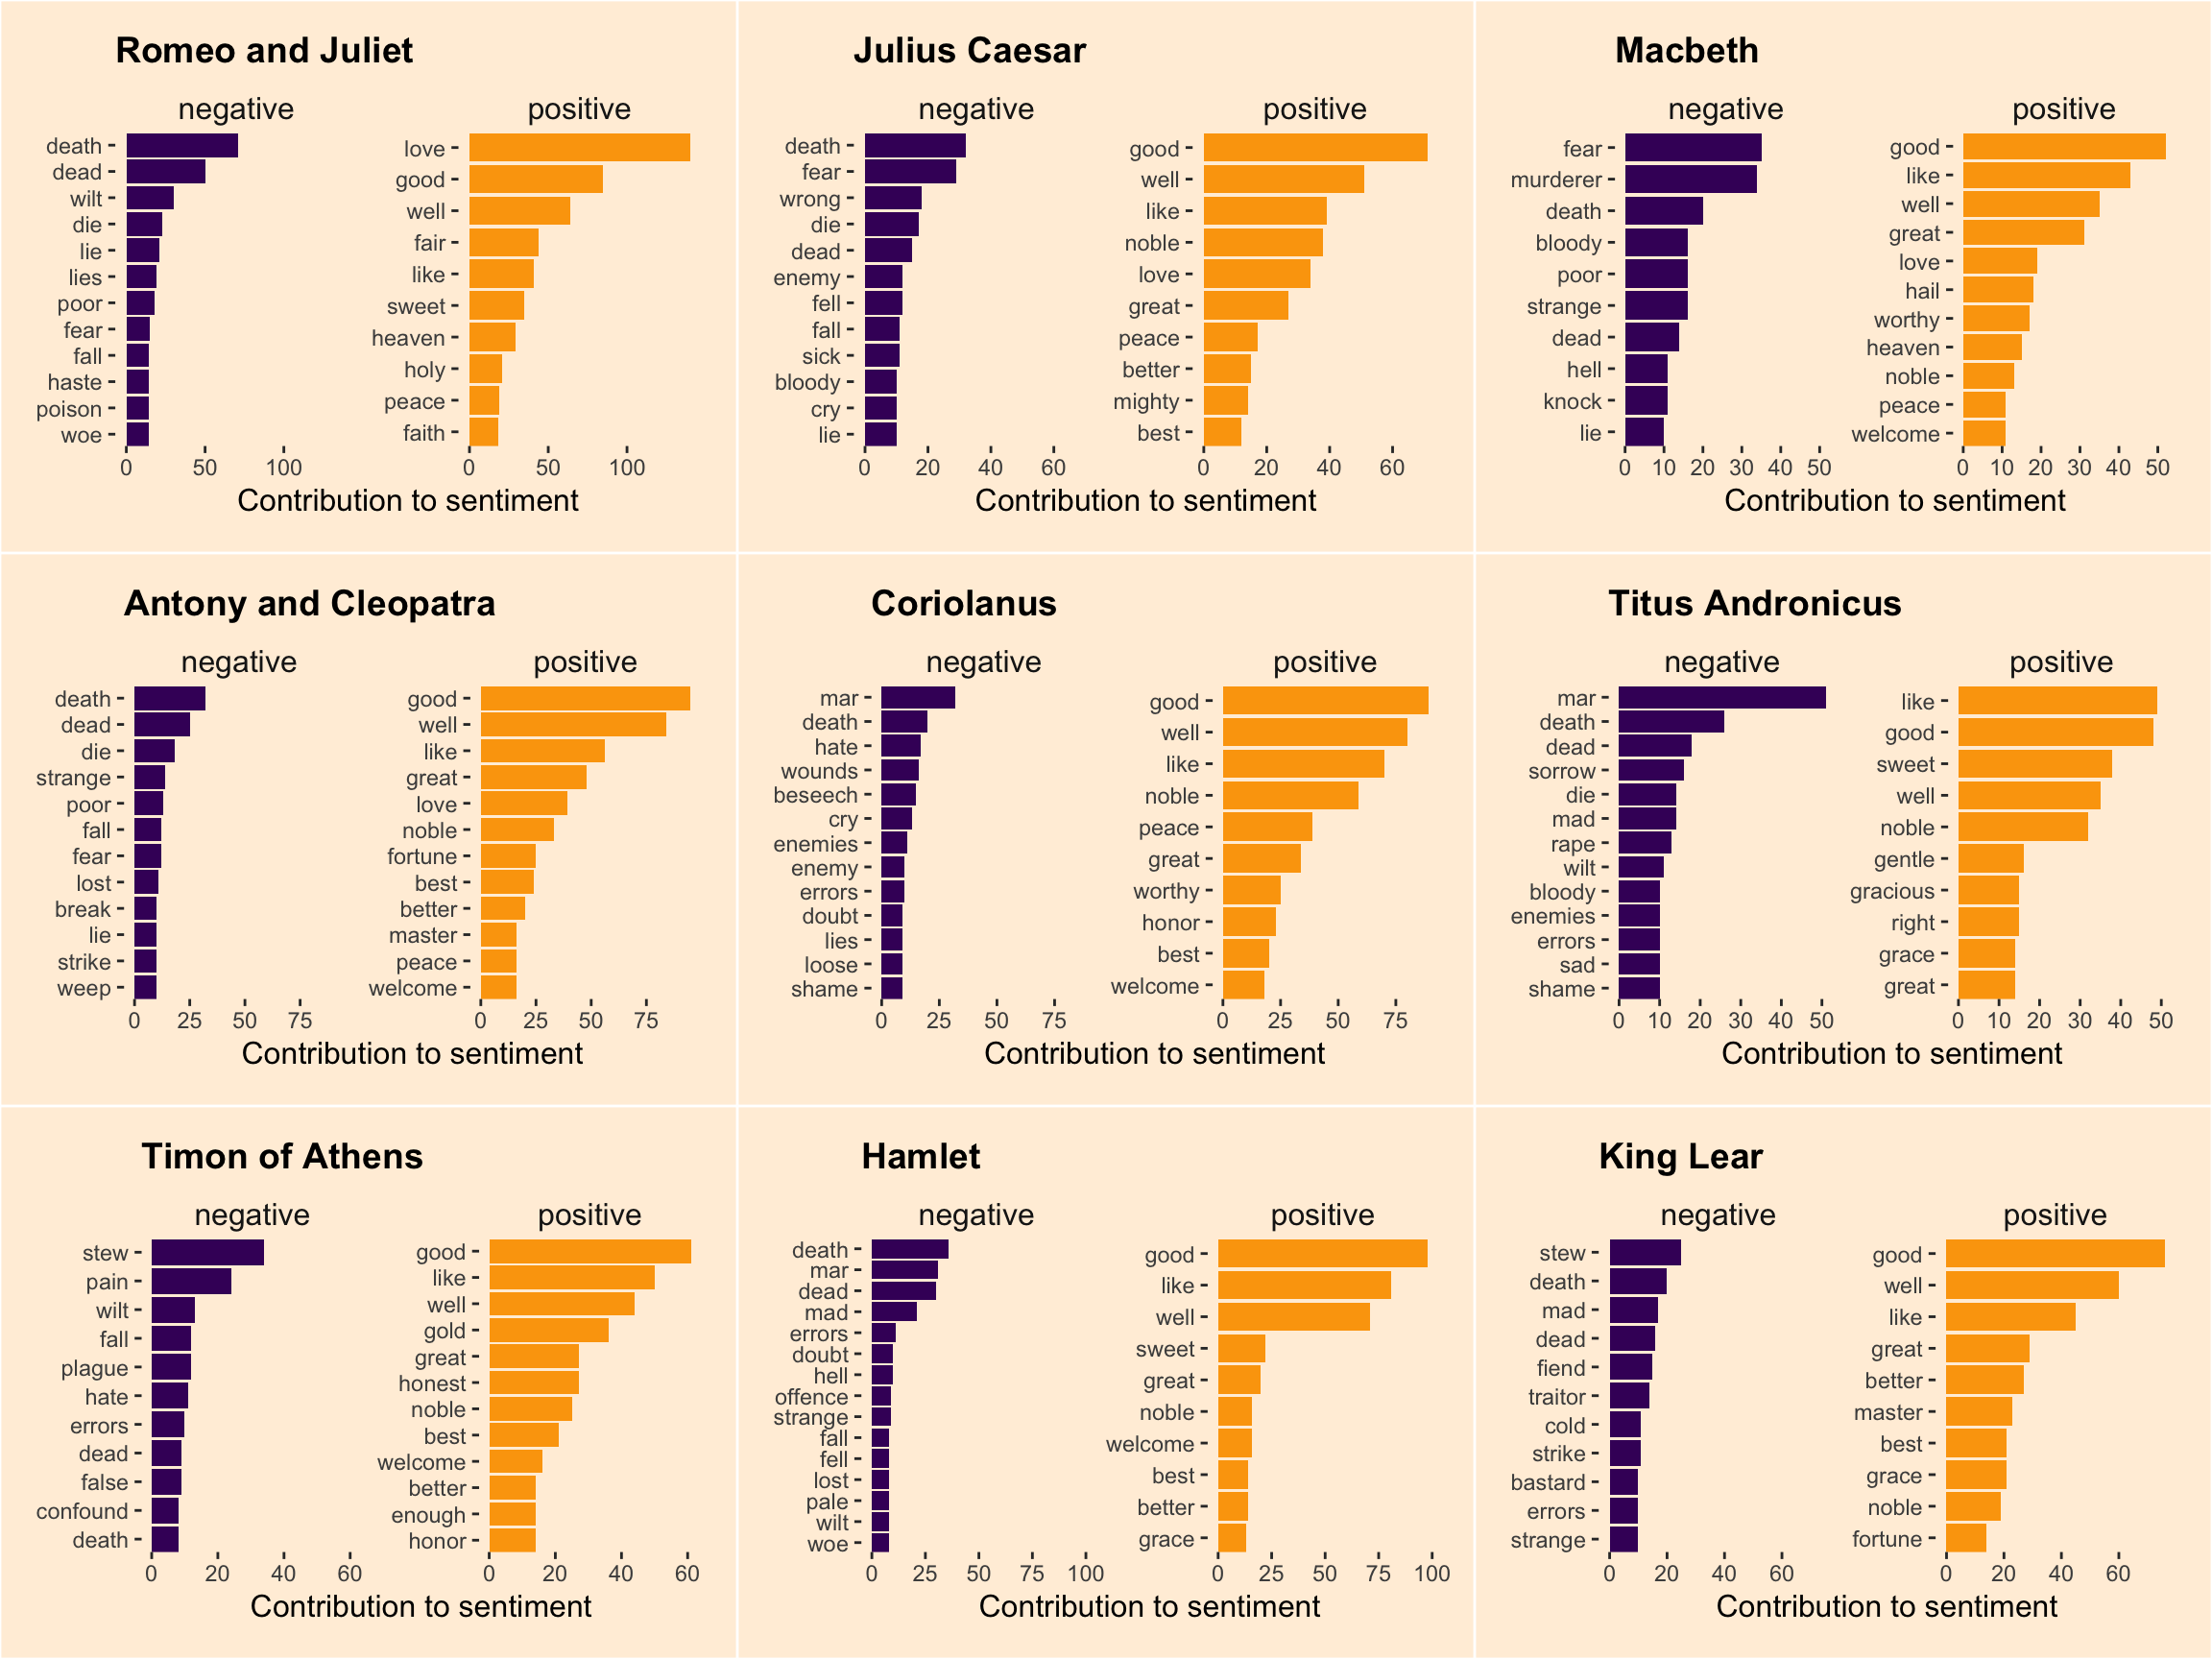

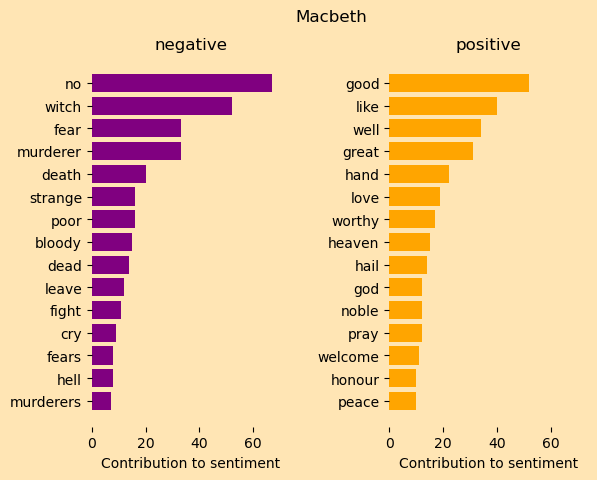

In [31]:
neg_words, neg_freq = zip(*nltk.FreqDist(negative_words).most_common(15))
pos_words, pos_freq = zip(*nltk.FreqDist(positive_words).most_common(15))

fig, axes = plt.subplots(ncols=2)
max_freq = max(max(neg_freq), max(pos_freq))

axes[0].barh(neg_words, neg_freq, color='purple')
axes[0].set_title('negative')
axes[0].set_xlabel('Contribution to sentiment')
axes[0].set_xlim(0, max_freq * 1.1)
axes[0].invert_yaxis()

axes[1].barh(pos_words, pos_freq, color='orange')
axes[1].set_title('positive')
axes[1].set_xlabel('Contribution to sentiment')
axes[1].set_xlim(0, max_freq * 1.1)
axes[1].invert_yaxis()

axes[0].set_facecolor('#FFE5B4')
axes[1].set_facecolor('#FFE5B4')
fig.patch.set_facecolor('#FFE5B4')
for spine in axes[1].spines.values():
    spine.set_visible(False)
for spine in axes[0].spines.values():
    spine.set_visible(False)
plt.subplots_adjust(wspace=0.5)
fig.suptitle('Macbeth')
plt.show()

My graphs look similar to those of the above graphs for Macbeth, but I noticed that my graph includes stop words like no which is why no is highest on the frequency list for negative words. The graphs will look even more similar if stop words are removed from my graphs. Another difference is witch is a negative word with high frequency in my graph but does not exist on the other graph.

The word list we created from Macbeth did not have the stopwords removed.
* Repeat the above analysis, but do so for a list of Macbeth words in which the stopwords have been removed.
* What changes?

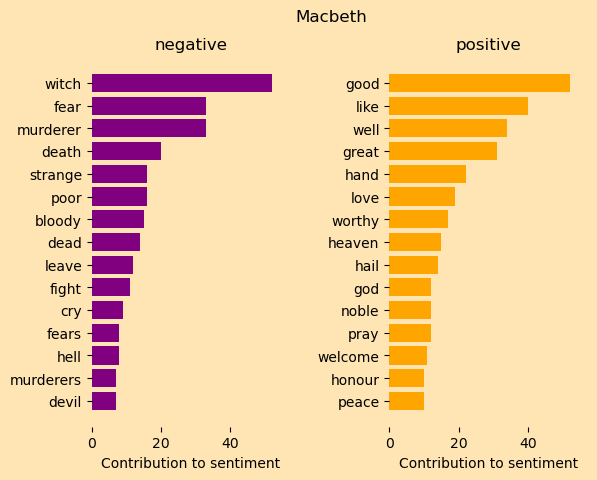

In [32]:
tokens = [i for i in nltk.word_tokenize(macbeth_string) if i.isalpha() and i not in stop_words]

# making a function for reusability
def plot_polarity(tokens):
    positive_words = [word for word in tokens if sia.polarity_scores(word)['compound'] > 0]
    negative_words = [word for word in tokens if sia.polarity_scores(word)['compound'] < 0]
    neg_words, neg_freq = zip(*nltk.FreqDist(negative_words).most_common(15))
    pos_words, pos_freq = zip(*nltk.FreqDist(positive_words).most_common(15))

    fig, axes = plt.subplots(ncols=2)
    max_freq = max(max(neg_freq), max(pos_freq))

    axes[0].barh(neg_words, neg_freq, color='purple')
    axes[0].set_title('negative')
    axes[0].set_xlabel('Contribution to sentiment')
    axes[0].set_xlim(0, max_freq * 1.1)
    axes[0].invert_yaxis()

    axes[1].barh(pos_words, pos_freq, color='orange')
    axes[1].set_title('positive')
    axes[1].set_xlabel('Contribution to sentiment')
    axes[1].set_xlim(0, max_freq * 1.1)
    axes[1].invert_yaxis()

    axes[0].set_facecolor('#FFE5B4')
    axes[1].set_facecolor('#FFE5B4')
    fig.patch.set_facecolor('#FFE5B4')
    for spine in axes[1].spines.values():
        spine.set_visible(False)
    for spine in axes[0].spines.values():
        spine.set_visible(False)
    plt.subplots_adjust(wspace=0.5)
    fig.suptitle('Macbeth')
    plt.show()

plot_polarity(tokens)

I can see that no was removed from my graph and my graphs are now more similar to the other graphs for Macbeth. However, murderer and murderers are still being grouped seperately which is a major difference between my graph and those of the other graph.

* Repeat the above analysis one more time -> in addition to removing the stopwords, use the Porter stemmer to get a list of stemmed words before you calculate the word frequencies.
* What words in your plot have now been counted together?

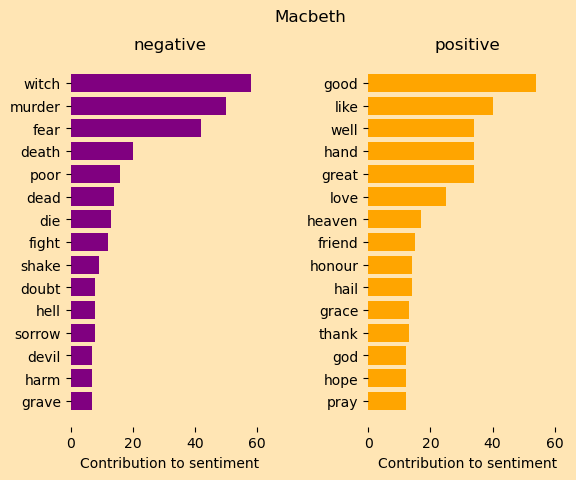

In [33]:
porter_stemmer = PorterStemmer()
stemmed_tokens = [porter_stemmer.stem(word) for word in tokens]
plot_polarity(stemmed_tokens)

Now muderer and murderers are grouped together under murder. Fear and fears are grouped together as well and other words that share a common stem. We are closer to the other graphs, but for some reason we have witch while the other graphs do not. I think this may be due to the fact that the other graphs used analyzers that gave witch a compound of 0, excluding it from the list of words.

## Romeo and Juliet

We are now going to plot the evolution of sentiment in Romeo and Juliet.

This is motivated by the following plot (also from the afore-mentioned link):

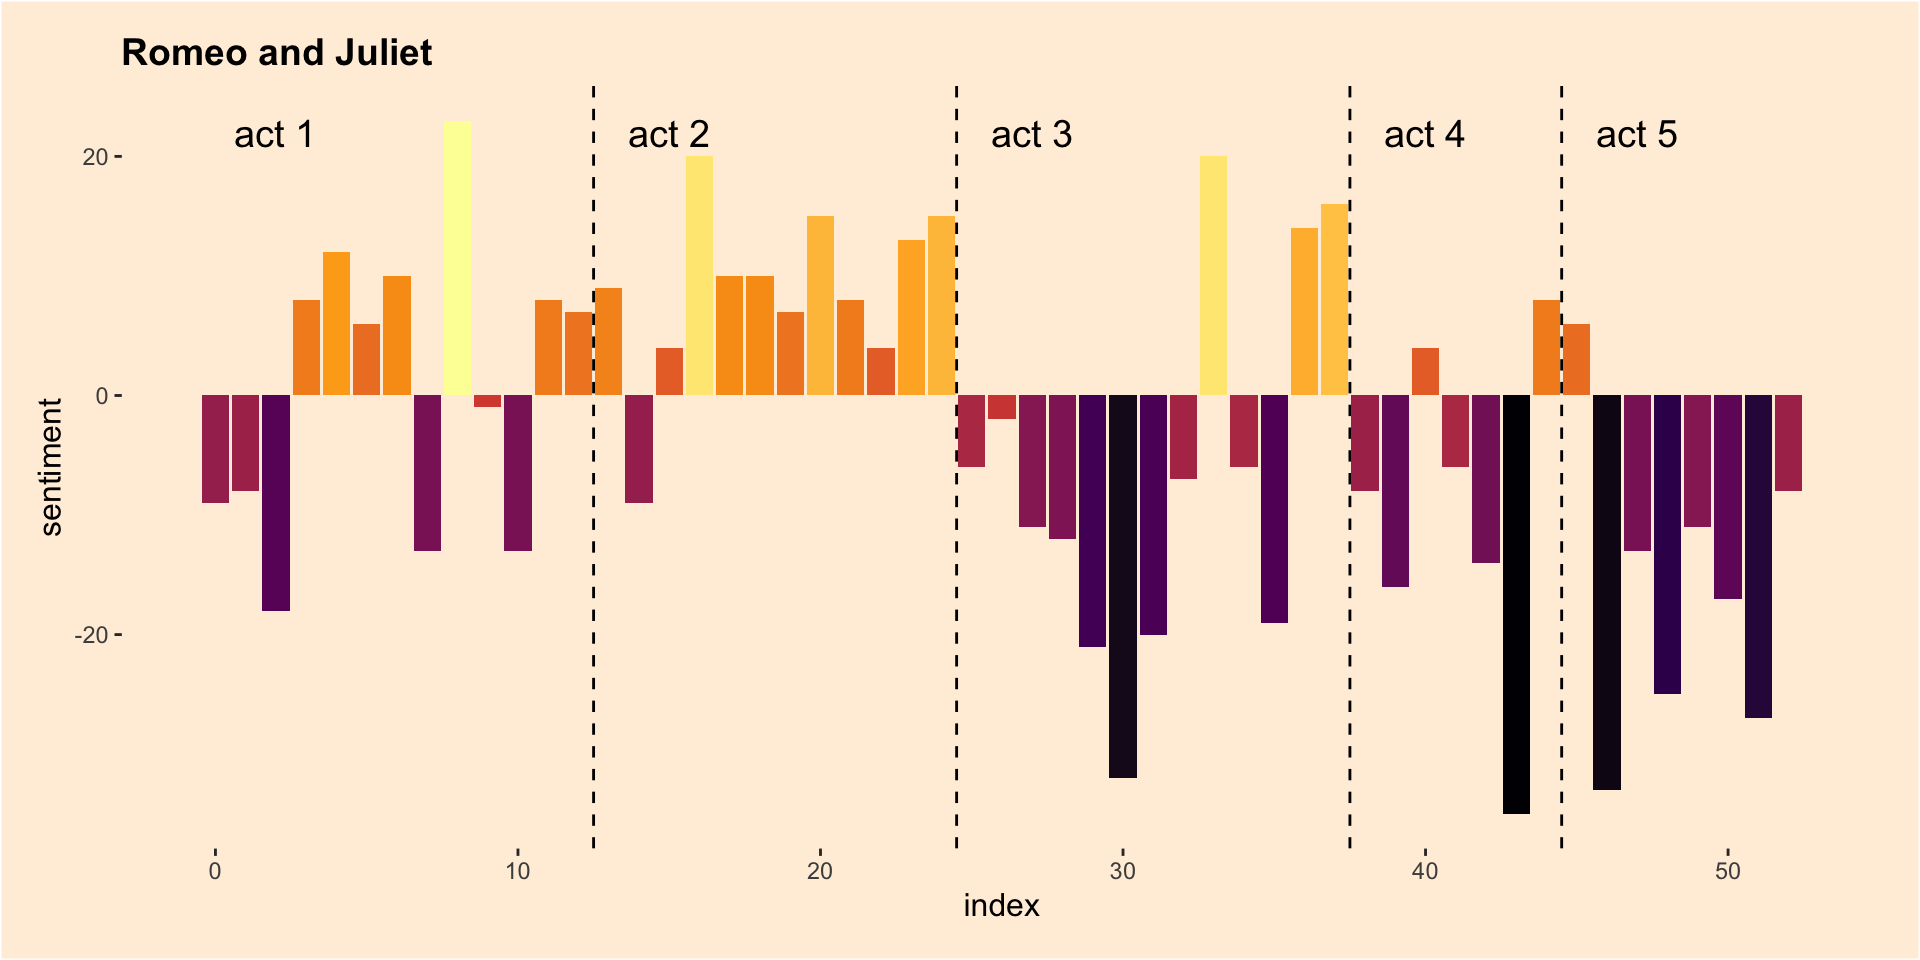

We are going to make a couple different plots.

First:
* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Sum the compound sentiment scores of every word in the scene (using VADER's SentimentIntensityAnalyser's polarity_scores method to get the compound sentiment score for each word).
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Comment on its resemblance to the Romeo and Juliet plot above.

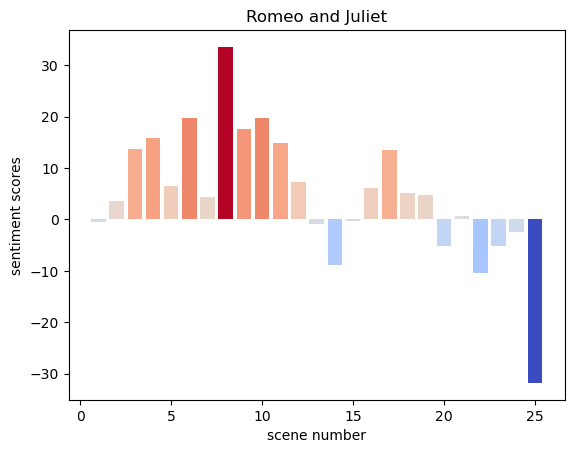

In [34]:
import numpy as np
scene_sentiments = []

for scene in r_j_scenes:
    tokens = word_tokenize(scene)
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    scene_sentiments.append(sum(sia.polarity_scores(word)['compound'] for word in words))

normalized_scores = np.interp(scene_sentiments, (min(scene_sentiments), max(scene_sentiments)), (0, 1))   
plt.bar(range(1, len(r_j_scenes) + 1), scene_sentiments, color=plt.cm.coolwarm(normalized_scores))
plt.xlabel('scene number')
plt.ylabel('sentiment scores')
plt.title('Romeo and Juliet')
plt.show()

My graph has some resemblance to the other graph but there are also massive differences, even just comparing the first 25 scenes between the two graphs. Our graph is highly negative towards scene 25 but the other graph is positive. This might be because the scene numbers are scaled differently? I see that our graph ends with high negativity as does the other graph.

Second:
* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 to the score for each positive word (compound_score > 0) and substracting 1 from the score for each negative word (compound_score < 0)**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous method of calculating the total scene sentiment score?

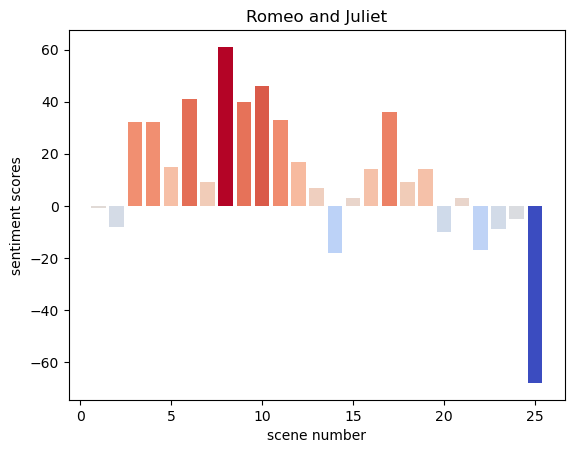

In [35]:
scene_sentiments = []

for scene in r_j_scenes:
    tokens = word_tokenize(scene)
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    sentiment_score = sum(1 if sia.polarity_scores(word)['compound'] > 0 else -1 if sia.polarity_scores(word)['compound'] < 0 else 0 for word in words)
    scene_sentiments.append(sentiment_score)

normalized_scores = np.interp(scene_sentiments, (min(scene_sentiments), max(scene_sentiments)), (0, 1))
plt.bar(range(1, len(r_j_scenes) + 1), scene_sentiments, color=plt.cm.coolwarm(normalized_scores))
plt.xlabel('scene number')
plt.ylabel('sentiment scores')
plt.title('Romeo and Juliet')
plt.show()

It changes it slightly, but not by a lot. I see that some of the scenes' sentiment scores are amplified by using this method.

Next, we are going to use a new lexicon to assess positive and negative word sentiment, the opinion_lexicon (https://www.nltk.org/api/nltk.corpus.reader.opinion_lexicon.html)

Execute the following cell to make a set of positive words and a set of negative words.

In [36]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

The following cell is an example of checking whether a word is positive or negative according to this opinion lexicon.  Try it out with a couple words.

In [37]:
testword = 'love'
if testword in positive_words:
    print(testword + ' is positive')
elif testword in negative_words:
    print(testword + ' is negative')
else:
    print(testword + ' is neither positive nor negative')

love is positive


Third plot:

* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the `positive_words` and `negative_words` sets.**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

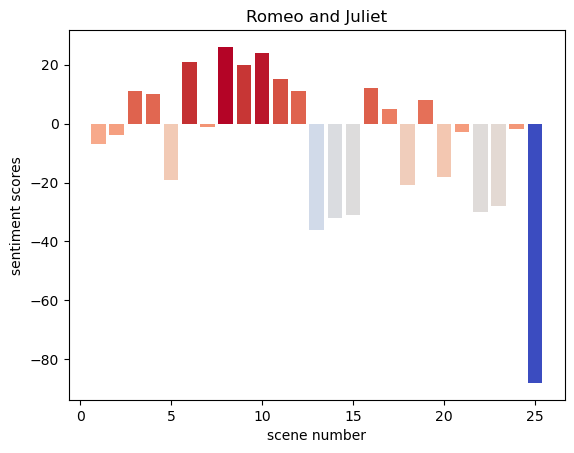

In [38]:
scene_sentiments = []

for scene in r_j_scenes:
    tokens = word_tokenize(scene)
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    sentiment_score = sum(1 if word in positive_words else -1 if word in negative_words else 0 for word in words)
    scene_sentiments.append(sentiment_score)
    
normalized_scores = np.interp(scene_sentiments, (min(scene_sentiments), max(scene_sentiments)), (0, 1))
plt.bar(range(1, len(r_j_scenes) + 1), scene_sentiments, color=plt.cm.coolwarm(normalized_scores))
plt.xlabel('scene number')
plt.ylabel('sentiment scores')
plt.title('Romeo and Juliet')
plt.show()

It seems using the opinion lexicon caused the sentiment for negative to be amplified and the sentiment for positive to be reduced. Perhaps a lot of the words used in Romeo and Juliet is considered negative by this opinionated lexicon.

Fourth plot:

* Take the entire string of Romeo and Juliet (`r_j_string`) and tokenize it into words.
* Calculate a total sentiment score for each consecutive group of 500 words.
  * Do this as immediately above by adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the `positive_words` and `negative_words` sets.
* Make a bar plot that has the group number (0,1,2,3,...) on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

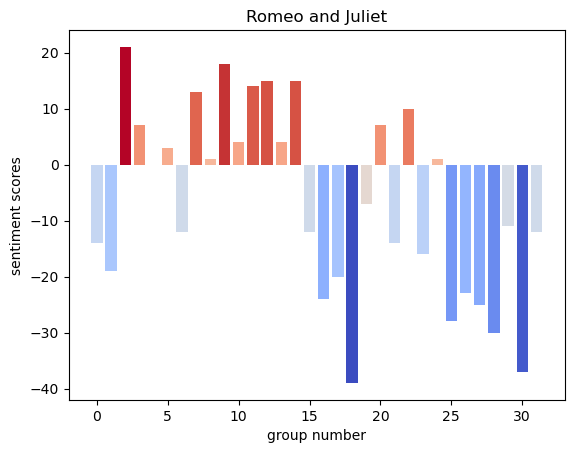

In [40]:
tokens = word_tokenize(r_j_string)
words = [word for word in tokens if word.isalpha() and word not in stop_words]
groups = [words[i:i + 500] for i in range(0, len(words), 500)]
sentiment_scores = []

for group in groups:
    sentiment_score = sum(1 if word in positive_words else -1 if word in negative_words else 0 for word in group)
    sentiment_scores.append(sentiment_score)

normalized_scores = np.interp(sentiment_scores, (min(sentiment_scores), max(sentiment_scores)), (0, 1))
plt.bar(range(len(sentiment_scores)), sentiment_scores, color=plt.cm.coolwarm(normalized_scores))
plt.xlabel('group number')
plt.ylabel('sentiment scores')
plt.title('Romeo and Juliet')
plt.show()

It changed the graph drastically, as now there seems to be a lot more negative sentiment being amplified. It maintains the negative ending, but there is also a lot more negative sentiment in the middle as opposed to the previous plots. It seems to be more similar to the example plot.

What method would you use if you had to report on the evolution of sentiment in Romeo and Juliet to an audience of Shakespearian academics?

I would use the first plot since it is easiest to interpret as the sentiment can be connected back to the scenes and it captures the true sum of the compound sentiments of the words in each scene. It has good context, good interpretability, and captures most appropriate academic specificity.